<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/pseudospectral%20kinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Método pseudoespectral para ondas kinks


# ttpsi - colpsi + dV/dpsi = 0;  unidimensional



N = 200

L0 = 10

col = np.cos(np.arange(N)*math.pi / N)     # pontos de colocação
x = L0 * np.arctanh(col)                   # mapeamento   

xcol = (1+np.tan(x/L0)**2)/L0              # dcol/dx
xxcol = 2*np.tan(x/L0)*(1+np.tan(x/L0)**2)/L0**2   # d^2 col / dx^2


T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
xxT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])
ccolT = np.zeros([N+2,N])

T[0,] = 1
T[1,] = col

for i in (range(2,N+2)):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

xT[0,] = 0
xT[1,] = xcol

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  xT[i,] = xcol*colT[i,]      # colT[i,] = dT[i,]/dcol, xcol = dcol/dx

xxT[0,] = 0
xxT[1,] = xxcol

for i in range(2, N+2):
  ccolT[i,] = 2*colT[i-1,] + 2*col*ccolT[i-1,] + 2*colT[i-1] - ccolT[i-2,]
  xxT[i,] = xxcol*colT[i,] + (xcol)**2 * ccolT[i,]   #ccolT[i,] = d²T[i,]/dcol²


psi = T[0:N,:]   
xpsi = xT[0:N,:]
xxpsi = xxT[0:N,:]

#xphi = np.dot(alpha, phi)

# Condicoes iniciais

x0 = 0
u = 0.1


f_k0 = np.tanh((x + x0)/np.sqrt(1 - u**2))        # dado inicial da solução viajante do kink 

f_antik0 = - np.tanh((x - x0)/np.sqrt(1 - u**2))  # dado inicial da solução viajante do antikink 

f_colisao0 = -1 + f_k0 - f_antik0                  # dado inicial da colisão de um kink com um antikink



psi0 = T[0:N,:]

inv_psi = np.linalg.inv(psi)

#a0 = np.dot(f_k0, inv_psi)   

a0 = np.dot(f_colisao0, inv_psi)  # coeficientes a(0)

phi = np.dot(a0, psi)      # solução exata em t=0



# Derivada temporal de psi para t = 0

dtf_k0 = -(1-np.tanh((x+x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

dtf_antik0 = -(1-np.tanh((x-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1) 

#da0 = np.dot(dtf_k0, inv_psi)  # da(0)



#dtphi = np.dot(da0, psi)

dtf_colisao0 = -1 + dtf_k0 - dtf_antik0

da0 = np.dot(dtf_colisao0, inv_psi)

psi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in arctanh
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in tan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in tan


array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.99987663,  0.99950656, ..., -0.99888987,
        -0.99950656, -0.99987663],
       [ 1.        ,  0.99950656,  0.99802673, ...,  0.99556196,
         0.99802673,  0.99950656],
       ...,
       [ 1.        , -0.99888987,  0.99556196, ...,  0.99002366,
        -0.99556196,  0.99888987],
       [ 1.        , -0.99950656,  0.99802673, ..., -0.99556196,
         0.99802673, -0.99950656],
       [ 1.        , -0.99987663,  0.99950656, ...,  0.99888987,
        -0.99950656,  0.99987663]])

In [6]:
# Plot: Condições Iniciais
M = 300

xplot = np.linspace(-30,30,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in (range(2,N+2)):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 

xplot0 = 0
u = 0.1

f_kplot = np.tanh((xplot + xplot0)/np.sqrt(1 - u**2))

f_antikplot =  - np.tanh((xplot - xplot0)/np.sqrt(1 - u**2))

f_coliplot0 = -1 + f_kplot - f_antikplot

a01 = np.dot(f_k0, inv_psi)

phiplot = np.dot(a01, psiplot)

erro = abs(phiplot - f_kplot)

da01 = np.dot(dtf_k0, inv_psi)

dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

dtphiplot = np.dot(da01, psiplot)

derro = abs(dtphiplot - dtfplot)




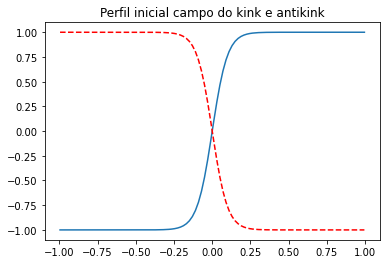

In [7]:
plt.plot(colplot, f_kplot)
plt.plot(colplot, f_antikplot, "--r")
plt.title("Perfil inicial campo do kink e antikink")
plt.show()

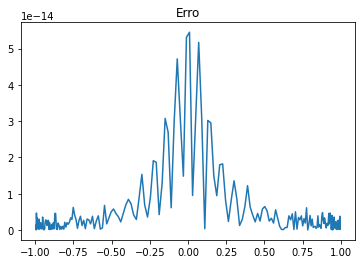

In [8]:
plt.plot(colplot, erro)
plt.title("Erro")
plt.show()

In [23]:

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It + 1)

#f_k = np.tanh((x + x0 - u*t)/np.sqrt(1 - u**2))    # solução viajante do kink f_k(t)

#f_antik = - np.tanh((x - x0 + u*t)/np.sqrt(1 - u**2))  # solução viajante do antikink f_antik(t)

#f_colisao = -1 + f_k - f_antik                   # solução da colisão do kink e antikink

V_phi = 1/4*(1 - phi**2)**2

dxV_phi =  -(-phi**2+1)*phi

eq0 =np.dot(a0, xxpsi) - dxV_phi

dda = np.dot(eq0, inv_psi)


for i in range(It):  # Runge Kutta 4th order
  L1 = h*(da0)
  K1 = h*(a0)

  L2 = h*(da0 + K1/2)
  K2 = h*dda*(a0 + L1/2)

  L3 = h*(da0 + K2/2)
  K3 = h*dda*(a0 + K2/2)

  L4 = h*(da0 + K3)
  K4 = h*dda*(a0 + L3)   
  
  da = 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  a = 1/6 * (L1 + 2*L2 + 2*L3 + L4)

eq = np.dot(a,xxpsi) - dxV_phi


IndexError: ignored

ValueError: ignored

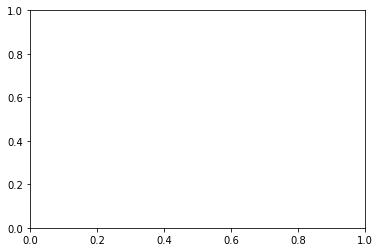

ValueError: ignored

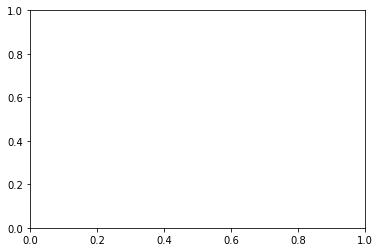

In [ ]:
plt.plot(colplot, erro2)
plt.show()